In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

# scikit learn library
import sklearn
from sklearn.cluster import DBSCAN
from collections import Counter

# Ignoring the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline
rcParams['figure.figsize']=5,4
sb.set_style('whitegrid')


In [3]:
df=pd.read_csv('iris.data.csv',header=None,sep=',')
df.columns=['Sepal Length','Sepal Width','Petal Length','Petal Width','Species']
data=df.ix[:,0:4].values
target=df.ix[:,4].values
# Printing out first 5 records
df[:5]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
model=DBSCAN(eps=0.8,min_samples=19).fit(data)
print (model)

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
    min_samples=19, n_jobs=1, p=None)


In [5]:
# In this example outliers are the records that come from -1 label
outliers_df=pd.DataFrame(data)

print(Counter(model.labels_))

print(outliers_df[model.labels_==-1])

Counter({1: 94, 0: 50, -1: 6})
       0    1    2    3
98   5.1  2.5  3.0  1.1
105  7.6  3.0  6.6  2.1
117  7.7  3.8  6.7  2.2
118  7.7  2.6  6.9  2.3
122  7.7  2.8  6.7  2.0
131  7.9  3.8  6.4  2.0


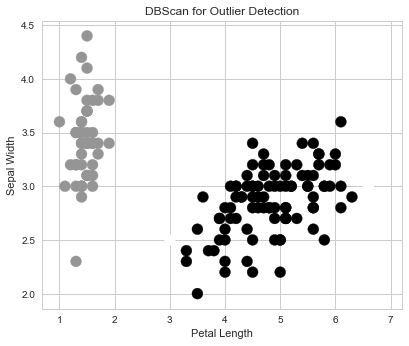

In [6]:
# Blank Figure
fig=plt.figure()
# Adding axes to it
ax=fig.add_axes([.1,.1,1,1])

# Colors assigned to be model labeling
colors=model.labels_

# Creating a Scatter plot of the Scatter method of ax object
# x-value for the scatter plot: data[:,2] is the third column of the data
# y-valuef or the scatter plot: data[:,1]
ax.scatter(data[:,2],data[:,1],c=colors,s=120)
#s is the point size
ax.set_xlabel('Petal Length')
ax.set_ylabel('Sepal Width')
plt.title('DBScan for Outlier Detection')